In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
color = sns.color_palette()

In [3]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
file = r'../data/OnlineRetail.csv'
online = pd.read_csv(file, encoding='Unicode_escape')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
online.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [10]:
online.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [15]:
online[online.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [5]:
df_new = online.dropna()  # 默认按行丢弃
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [18]:
df_new[df_new['Quantity']==80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [19]:
df_new[df_new['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [6]:
df_new.drop([540421, 540422], axis=0, inplace=True)  # 这个命令只能通过行索引或者列索引进行删除

In [7]:
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [8]:
df_new['Description'] = df_new['Description'].str.lower()

In [30]:
online = pd.read_csv(file, parse_dates=['InvoiceDate'], encoding='Unicode_escape')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df_new['CustomerID'] = df_new['CustomerID'].astype(int)
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
df_new['TotalPrice'] = df_new['UnitPrice'] * df_new['Quantity']
df_new = df_new[['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
                 'TotalPrice', 'CustomerID', 'Country']]
# 对数据的列名进行排序
df_new.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,TotalPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [11]:
df_new.insert(loc=2, column='YearMonth',
              value=df_new['InvoiceDate'].map(lambda x:x.year*100+x.month))
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,StockCode,Description,Quantity,UnitPrice,TotalPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [39]:
df_new.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
YearMonth               int64
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
TotalPrice            float64
CustomerID              int32
Country                object
dtype: object

In [12]:
df_new.insert(loc=3, column='month',
              value=df_new['InvoiceDate'].dt.month)
df_new.insert(loc=4, column='day',
              value=df_new['InvoiceDate'].dt.weekday+1)
df_new.insert(loc=5, column='hour',
              value=df_new['InvoiceDate'].dt.hour)
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,month,day,hour,StockCode,Description,Quantity,UnitPrice,TotalPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [41]:
df_new.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
YearMonth               int64
month                   int64
day                     int64
hour                    int64
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
TotalPrice            float64
CustomerID              int32
Country                object
dtype: object

In [43]:
df_new[df_new['CustomerID']==12346]

,InvoiceNo,InvoiceDate,YearMonth,month,day,hour,StockCode,Description,Quantity,UnitPrice,TotalPrice,CustomerID,Country
61619,541431,2011-01-18 10:01:00,201101,1,2,10,23166,medium ceramic top storage jar,74215,1.04,77183.6,12346,United Kingdom
61624,C541433,2011-01-18 10:17:00,201101,1,2,10,23166,medium ceramic top storage jar,-74215,1.04,-77183.6,12346,United Kingdom


In [45]:
df_new.groupby(by=['CustomerID', 'Country'])[['InvoiceNo']].count().head()

,,InvoiceNo
CustomerID,Country,
12346,United Kingdom,2
12347,Iceland,182
12348,Finland,31
12349,Italy,73
12350,Norway,17


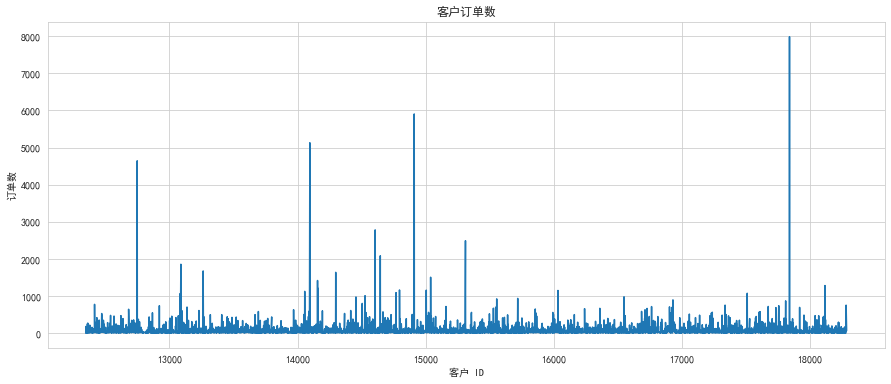

In [50]:
orders = df_new.groupby(by=['CustomerID', 'Country'], as_index=False)[['InvoiceNo']].count()
# as_index=True的话 会返回那个key和value, 如果为False,只返回value
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot('CustomerID', 'InvoiceNo', data=orders)
# ax.plot(ordes['CustomerID', ])
ax.set(xlabel='客户 ID', ylabel='订单数', title='客户订单数')
plt.show()

In [51]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4050,17841,United Kingdom,7983
1903,14911,EIRE,5903
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4642
1682,14606,United Kingdom,2782


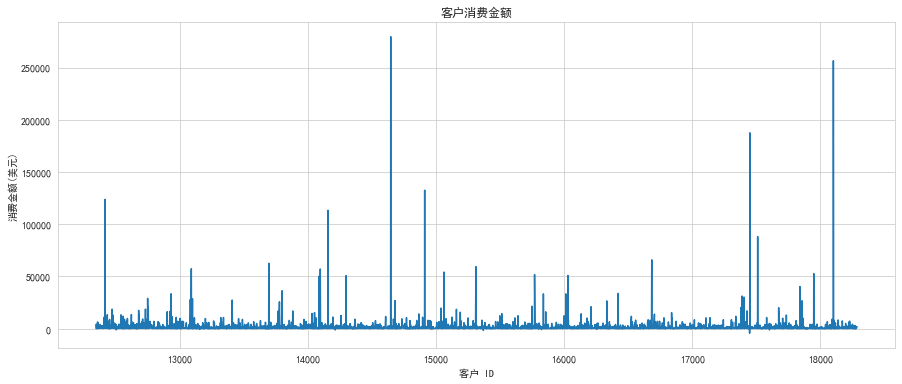

In [13]:
money_spent = df_new.groupby(by=['CustomerID', 'Country'], as_index=False)['TotalPrice'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot('CustomerID', 'TotalPrice', data=money_spent)
# ax.plot(ordes['CustomerID', ])
ax.set(xlabel='客户 ID', ylabel='消费金额(美元)', title='客户消费金额')
plt.show()

In [14]:
money_spent.sort_values(by='TotalPrice', ascending=False).head()

,CustomerID,Country,TotalPrice
1711,14646,Netherlands,279489.02
4241,18102,United Kingdom,256438.49
3766,17450,United Kingdom,187482.17
1903,14911,EIRE,132572.62
57,12415,Australia,123725.45


In [85]:
data = df_new.groupby('YearMonth')['InvoiceNo'].unique()
data

YearMonth
201012    [536365, 536366, 536367, 536368, 536369, 53637...
201101    [539993, 540001, 540002, 540003, 540004, 54000...
201102    [542776, 542777, 542778, 542779, 542780, C5427...
201103    [545220, 545221, 545222, 545223, 545224, 54522...
201104    [548550, 548551, 548552, 548553, 548554, 54855...
201105    [551515, 551516, 551517, 551518, 551519, 55152...
201106    [555156, 555157, 555158, 555159, 555160, 55516...
201107    [558638, 558639, 558640, 558641, 558642, 55864...
201108    [561904, 561905, 561906, 561907, 561908, 56190...
201109    [565080, 565082, 565083, 565084, C565085, 5650...
201110    [569203, 569204, 569205, 569206, 569207, 56920...
201111    [573744, 573745, 573746, 573747, 573748, 57374...
201112    [C579889, C579890, C579891, C579892, C579893, ...
Name: InvoiceNo, dtype: object

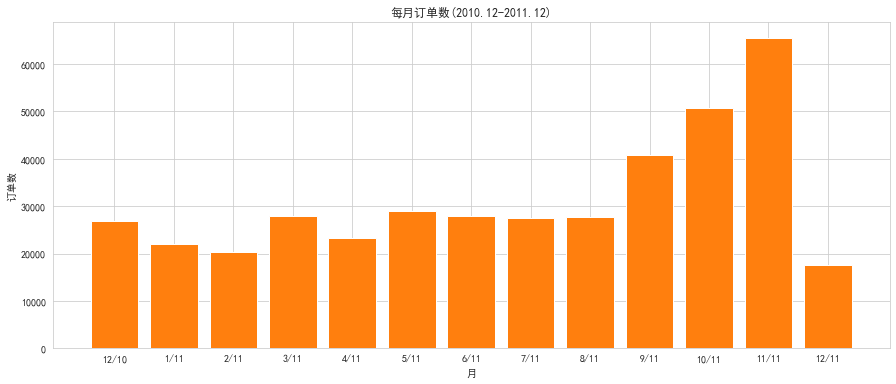

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
x = ['12/10', '1/11', '2/11', '3/11', '4/11', '5/11', '6/11', '7/11', '8/11',
     '9/11', '10/11', '11/11', '12/11']
ax.bar(x=x, height='InvoiceNo', color=color[1], data=data)
ax.set(xlabel='月', ylabel='订单数', title='每月订单数(2010.12-2011.12)')
# ax.set_xticklabels(('12/10', '1/11', '2/11', '3/11', '4/11', '5/11', '6/11',
#                    '7/11', '8/11', '9/11', '10/11', '11/11', '12/11'))
plt.show()

In [68]:
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,month,day,hour,StockCode,Description,Quantity,UnitPrice,TotalPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [69]:
data = df_new.groupby('day')[['InvoiceNo']].count()
data

,InvoiceNo
day,
1,66382
2,68110
3,70599
4,82374
5,56125
7,63237


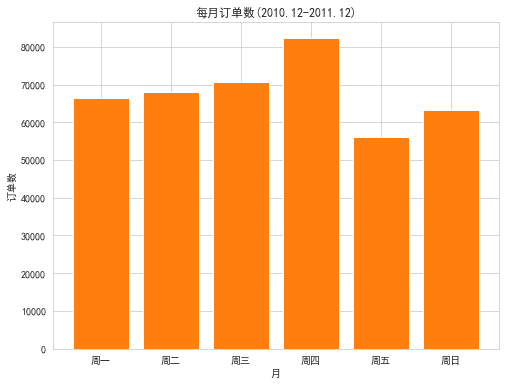

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
x = ['周一', '周二', '周三', '周四', '周五', '周日']
ax.bar(x=x, height='InvoiceNo', color=color[1], data=data)
ax.set(xlabel='月', ylabel='订单数', title='每月订单数(2010.12-2011.12)')
plt.show()

In [98]:
groups = df_new.groupby('Country')['InvoiceNo'].count().sort_values(ascending=True)
groups

Country
Saudi Arabia                10
Bahrain                     17
Czech Republic              30
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          61
United Arab Emirates        68
Malta                      127
Greece                     146
Canada                     151
Iceland                    182
Singapore                  229
Unspecified                244
Israel                     250
USA                        291
Poland                     341
Japan                      358
Denmark                    389
Austria                    401
Sweden                     462
Cyprus                     622
Finland                    695
Channel Islands            758
Italy                      803
Norway                    1086
Australia                 1259
Portugal                  1480
Switzerland               1877
Belgium                   2069
Netherlands               2371


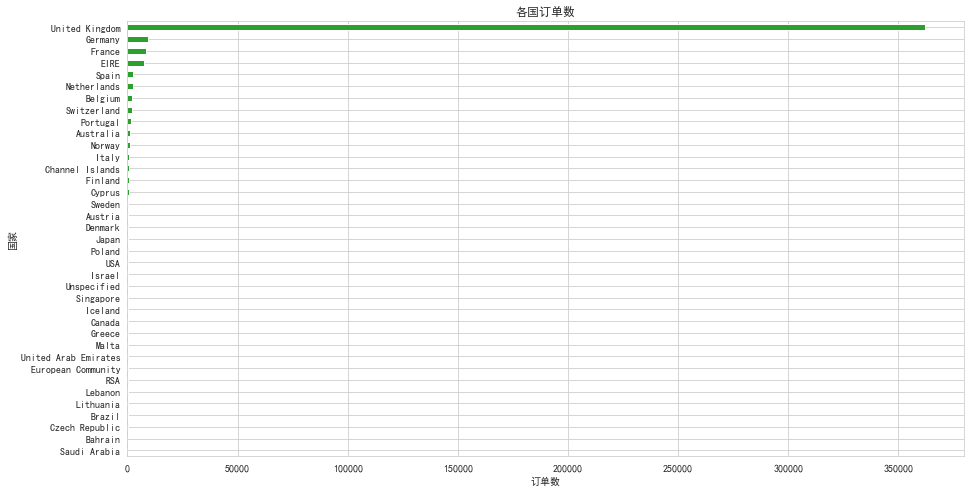

In [99]:
plt.subplots(figsize=(15, 8))
groups.plot(kind='barh', color=color[2])
plt.xlabel('订单数')
plt.ylabel('国家')
plt.title('各国订单数')
plt.show()

In [100]:
groups

Country
Saudi Arabia                10
Bahrain                     17
Czech Republic              30
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          61
United Arab Emirates        68
Malta                      127
Greece                     146
Canada                     151
Iceland                    182
Singapore                  229
Unspecified                244
Israel                     250
USA                        291
Poland                     341
Japan                      358
Denmark                    389
Austria                    401
Sweden                     462
Cyprus                     622
Finland                    695
Channel Islands            758
Italy                      803
Norway                    1086
Australia                 1259
Portugal                  1480
Switzerland               1877
Belgium                   2069
Netherlands               2371


In [101]:
del groups['United Kingdom']  # 由于现在group为Series,country为index, 所以可以直接这样删除

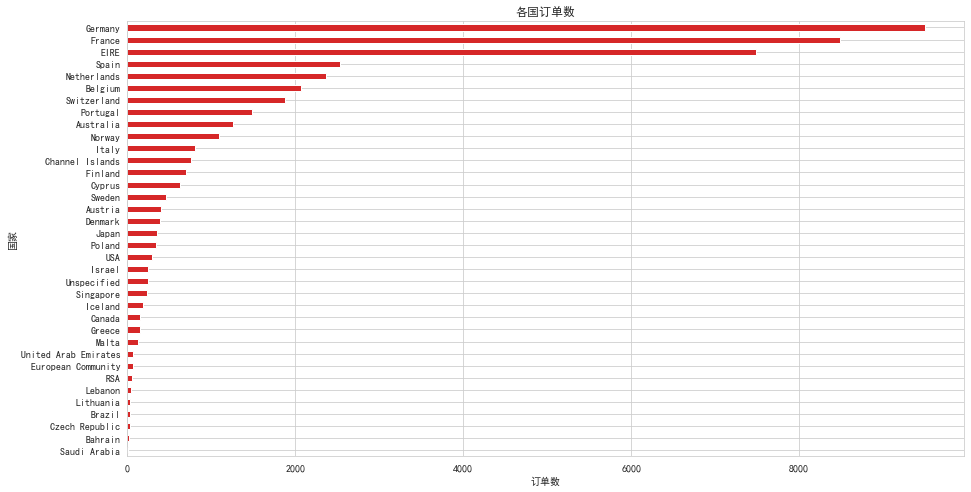

In [102]:
plt.subplots(figsize=(15, 8))
groups.plot(kind='barh', color=color[3])
plt.xlabel('订单数')
plt.ylabel('国家')
plt.title('各国订单数')
plt.show()